In [387]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [441]:
def draw_points(x,y,edges,colors={}):
    """Plot 2d points, and connect them with edges,
    and color the edges with optional colors."""
    
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(x,y)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    for i, (fromv, tov) in enumerate( edges ):
        linex = x[[fromv,tov]]
        liney = y[[fromv,tov]]
        
        color = colors.get(i,"black")
        
        plt.plot(linex,liney,c=color)
    plt.show()

Say we have 8 points, each at the corner of a cube in three dimensions.

In [442]:
# make a bunch of cube corner points
pts = []
for x in [-10,10]:
    for y in [-10,10]:
        for z in [-10,10]:
            pts.append( (x,y,z) )

# make an orientation structure showing all three axes
pts.append( [0,0,0] )
pts.append( [5,0,0] )
pts.append( [0,5,0] )
pts.append( [0,0,5] )

pts = np.array(pts)
print pts

[[-10 -10 -10]
 [-10 -10  10]
 [-10  10 -10]
 [-10  10  10]
 [ 10 -10 -10]
 [ 10 -10  10]
 [ 10  10 -10]
 [ 10  10  10]
 [  0   0   0]
 [  5   0   0]
 [  0   5   0]
 [  0   0   5]]


Specify the lines along the edges of the cube.

In [443]:
# e is a list of (origin point index, destination point index) pairs
e = [(0,1),(0,2),(0,4),(1,3),(1,5),(2,3),(2,6),(3,7),(4,5),(4,6),(5,7),(6,7)]

# orientation structure lines
e.extend( [(8,9),(8,10),(8,11)] )

# specify the colors of the orientation structure lines
colors = {12:'red',13:'green',14:'blue'}

If we want to see this cube, we could just plot the first two dimensions

In [444]:
x,y,z = pts.T
print x
print y

[-10 -10 -10 -10  10  10  10  10   0   5   0   0]
[-10 -10  10  10 -10 -10  10  10   0   0   5   0]


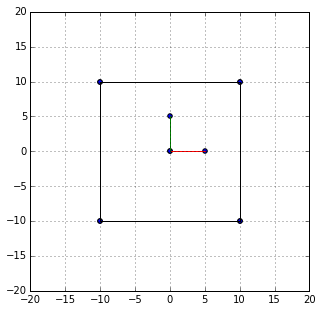

In [445]:
draw_points(x,y,e,colors)

What if you want to see it from a different angle? Rotate it with a rotation matrix.

First, we construct the 3d rotation matrix as a product of the rotation matrices for the three axes.

In [446]:
def make_rotation_matrices(alpha,beta,gamma):
    A_x = np.array([[1,0,0],
                    [0,np.cos(alpha),-np.sin(alpha)],
                    [0,np.sin(alpha),np.cos(alpha)]])
    A_y = np.array([[np.cos(beta),0,np.sin(beta)],
                    [0,1,0],
                    [-np.sin(beta),0,np.cos(beta)]])
    A_z = np.array([[np.cos(gamma),-np.sin(gamma),0],
                    [np.sin(gamma),np.cos(gamma),0],
                    [0,0,1]])

    A = np.dot( np.dot(A_x,A_y), A_z )
    
    return A_x,A_y,A_z,A

In [447]:
theta_x = np.pi/6 #rotate 30 degrees about the x axis
theta_y = np.pi/24 #rotate 7.5 degrees about the y axis
theta_z = 0

A_x,A_y,A_z,A = make_rotation_matrices(theta_x,theta_y,theta_z)

print "A_x:"
print A_x
print
print "A_y:"
print A_y
print
print "A_z:"
print A_z
print
print "A:"
print A

A_x:
[[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]

A_y:
[[ 0.99144486  0.          0.13052619]
 [ 0.          1.          0.        ]
 [-0.13052619  0.          0.99144486]]

A_z:
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

A:
[[ 0.99144486  0.          0.13052619]
 [ 0.0652631   0.8660254  -0.49572243]
 [-0.113039    0.5         0.85861644]]


Then, to use the rotation matrix **A**, just multiply it by each point.

In [448]:
pts_prime = []
for pt in pts:
    pt_prime = np.dot(A,pt)
    pts_prime.append( pt_prime )
pts_prime = np.vstack(pts_prime)

In [449]:
print pts_prime

[[-11.21971054  -4.35566069 -12.45577438]
 [ -8.60918669 -14.27010931   4.71655435]
 [-11.21971054  12.96484738  -2.45577438]
 [ -8.60918669   3.05039877  14.71655435]
 [  8.60918669  -3.05039877 -14.71655435]
 [ 11.21971054 -12.96484738   2.45577438]
 [  8.60918669  14.27010931  -4.71655435]
 [ 11.21971054   4.35566069  12.45577438]
 [  0.           0.           0.        ]
 [  4.95722431   0.32631548  -0.56519499]
 [  0.           4.33012702   2.5       ]
 [  0.65263096  -2.47861215   4.29308218]]


Matrix multiplication is like doing the matrix-vector product for every column in the second matrix, which simplifies things beautifully.

In [450]:
pts_prime = np.dot(A,pts.T).T
print pts_prime #same as above

[[-11.21971054  -4.35566069 -12.45577438]
 [ -8.60918669 -14.27010931   4.71655435]
 [-11.21971054  12.96484738  -2.45577438]
 [ -8.60918669   3.05039877  14.71655435]
 [  8.60918669  -3.05039877 -14.71655435]
 [ 11.21971054 -12.96484738   2.45577438]
 [  8.60918669  14.27010931  -4.71655435]
 [ 11.21971054   4.35566069  12.45577438]
 [  0.           0.           0.        ]
 [  4.95722431   0.32631548  -0.56519499]
 [  0.           4.33012702   2.5       ]
 [  0.65263096  -2.47861215   4.29308218]]


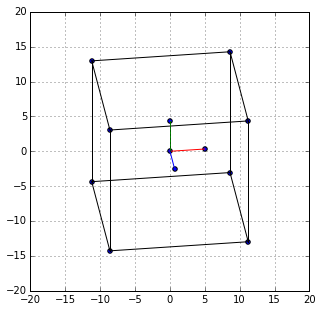

In [451]:
x,y,z = pts_prime.T
draw_points(x,y,e,colors)

Let's step back and revisit what we've done so far. 

We started with a 3d cube with edges oriented along the spatial axes. In order to view it, we picked two dimensions - the first and second dimensions 'x' and 'y', to map to our screen's horizontal and vertical dimensions. In principle we could have picked any two of the three spatial dimensions, but (x,y) has the unique property that the orthogonal dimension 'z' points out of the screen when x and y are aligned to screen-right and screen-up.

looking down the z (blue) axis, from the 'front'


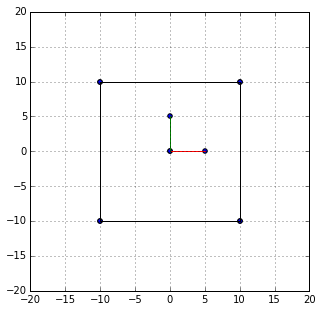

looking up the y (green) axis, from the 'bottom'


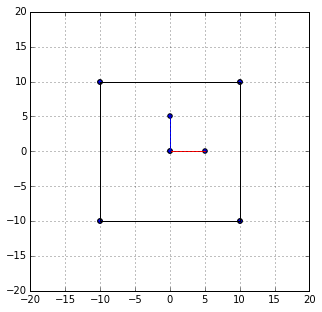

looking up the x (red) axis, from the 'left'


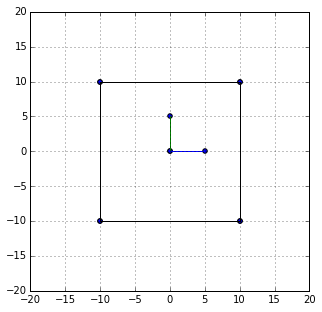

In [452]:
x,y,z = pts.T
print "looking down the z (blue) axis, from the 'front'"
draw_points(x,y,e,colors)
print "looking up the y (green) axis, from the 'bottom'"
draw_points(x,z,e,colors)
print "looking up the x (red) axis, from the 'left'"
draw_points(z,y,e,colors)

Next, in order to get a better view of the cube's depth aspect, we rotated the _entire scene_ 30 degrees in the positive (that is to say, counterclockwise) direction about the x (red) axis, and a few degrees again counterclockwise around the y (green) axis. This isn't a projection of the 3d points onto a 2d screen - this is a transformation of the entire 3d scene into another 3d scene. At the end of this transformation we're still left with the problem of how to view the scene on a 2d surface. Fortunately, we can just do what we did before - pick two axes to map to screen axes.

from the front


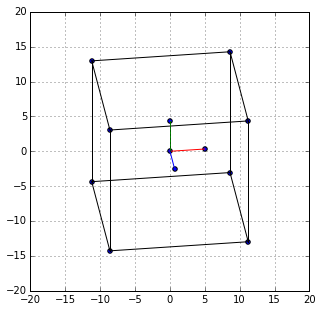

from the bottom


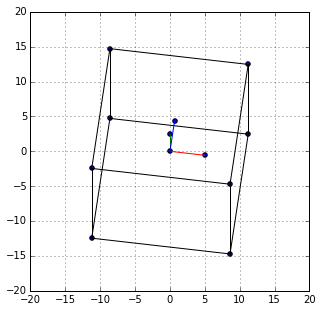

In [453]:
x,y,z = pts_prime.T
print "from the front"
draw_points(x,y,e,colors)
print "from the bottom"
draw_points(x,z,e,colors)

Alternatively one can conceptualize the rotation as a transformation of all the scene's points from the world coordinate system to the viewpoint's coordinate system. In this case, if the viewpoint rotates by $\theta$, the world coordinates need to rotate by $-\theta$ to transform to camera coordinates.

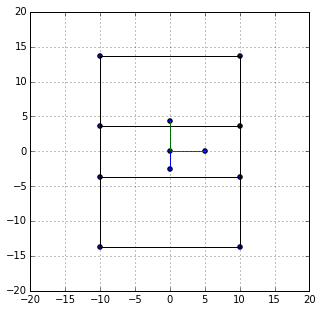

In [480]:
theta = np.array((-np.pi/6,0,0)) #viewpoint tilts down 30 degrees.
_,_,_,A = make_rotation_matrices(*-theta)
x,y,z = np.dot(A,pts.T)
draw_points(x,y,e,colors)

All of this assumes a viewpoint at the origin. If the viewpoint is anywhere else, subtract the viewpoint from the world coordinates to get the viewpoint-centered coordinates.

translation


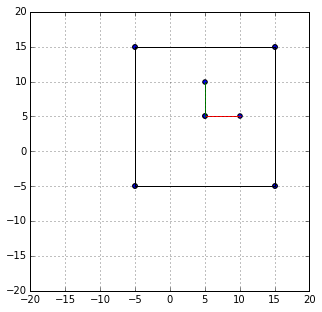

In [501]:
viewpoint = np.array([-5,-5,0])
x,y,z = (pts - viewpoint).T

print "translation"
draw_points(x,y,e,colors)

translation and rotation


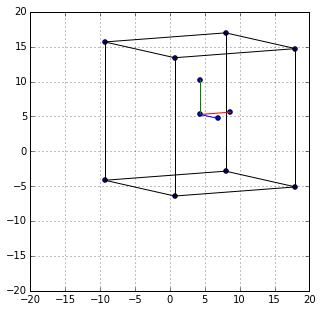

In [502]:
viewpoint = np.array([-5,-5,0])
x,y,z = np.dot(A, (pts - viewpoint).T)

print "translation and rotation"
draw_points(x,y,e,colors)

viewpoint 20 points in front of screen, look right 30 degrees, look down a little


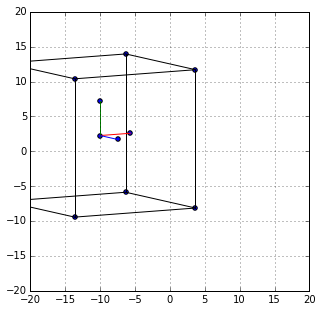

In [499]:
print "viewpoint 20 points in front of screen, look right 30 degrees, look down a little"
theta = np.array((-np.pi/24,-np.pi/6,0))
viewpoint = np.array([0,0,20])

_,_,_,A = make_rotation_matrices(*-theta)
x,y,z = np.dot(A,(pts-viewpoint).T)
draw_points(x,y,e,colors)

Let's look at a scenario where we have out basic cube and we're looking straight ahead from a z coordinate of about 30 units.

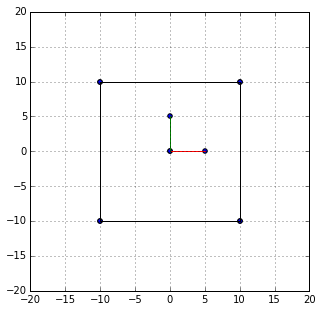

In [533]:
theta = np.array((0,0,0))
viewpoint = np.array([0,0,30])

_,_,_,A = make_rotation_matrices(*-theta)
x,y,z = np.dot(A,(pts-viewpoint).T)
draw_points(x,y,e,colors)

In this case the x and y coordinates display on the screen, and the z coordinates, which indicate each point's position perpendicular to the screen, is thrown away. Note they're all negative - all the points are behind the screen.

In [534]:
print z

[-40. -20. -40. -20. -40. -20. -40. -20. -30. -30. -30. -25.]


We can use this information to give the image a perspective illusion, by making points 'bigger' the closer they are to the screen. The bigness of each point would be the inverse of its depth.

In [535]:
focal_length = 30.0
bigness = focal_length/abs(z)
print bigness
perpective_x = x*bigness
perpective_y = y*bigness

[ 0.75  1.5   0.75  1.5   0.75  1.5   0.75  1.5   1.    1.    1.    1.2 ]


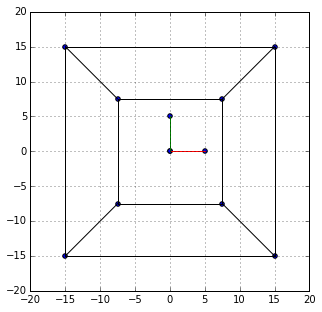

In [536]:
draw_points(perpective_x,perpective_y,e,colors)

move back 40, left 20, up 20
look right 15 degrees, and down 15 degrees
without perspective


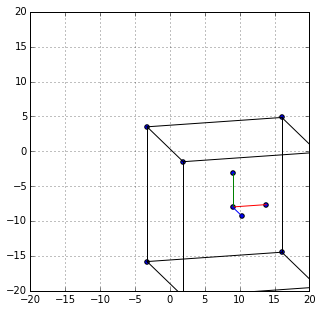

with perspective


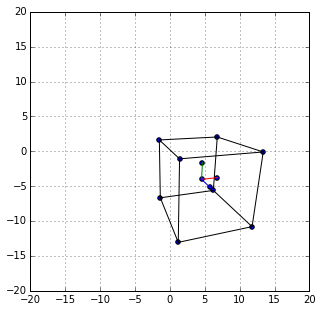

In [552]:
print "move back 40, left 20, up 20"
print "look right 15 degrees, and down 15 degrees"
theta = np.array((-np.pi/12,-np.pi/12,0))
viewpoint = np.array([-20,20,40])

_,_,_,A = make_rotation_matrices(*-theta)
x,y,z = np.dot(A,(pts-viewpoint).T)

focal_length = 24.0
bigness = focal_length/abs(z)
perpective_x = x*bigness
perpective_y = y*bigness

print "without perspective"
draw_points(x,y,e,colors)
print "with perspective"
draw_points(perpective_x,perpective_y,e,colors)

Efficient vectorization and optical camera distortion is left as an exercise to the reader.